# Leonardo Sanchez Roncancio

* # Caso 1: predicción de enfermedades cardiovasculares

In [103]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pyproj
from scipy import stats
import warnings
from sklearn.preprocessing import MinMaxScaler

In [104]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [105]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


# Valores duplicados de ID? 

In [106]:
valores_duplicados = df[df['patientid'].duplicated()]['patientid'].unique()
print("Valores duplicados:", valores_duplicados)

Valores duplicados: []


In [107]:
# Identificar columnas numericas de las categoricas
cols_num = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"]
cols_cat = ["gender", "chestpain", "fastingbloodsugar", "restingrelectro", "exerciseangia", "slope", "noofmajorvessels", "target"]

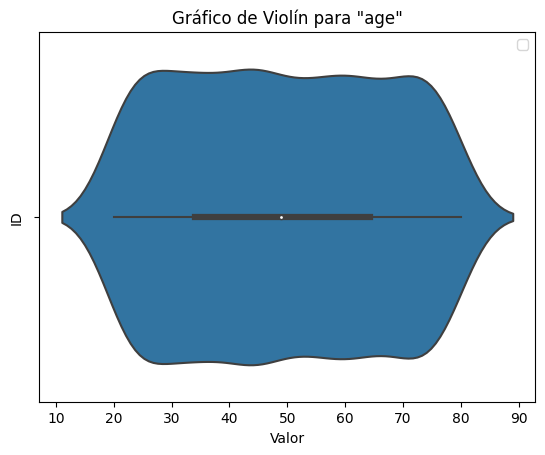

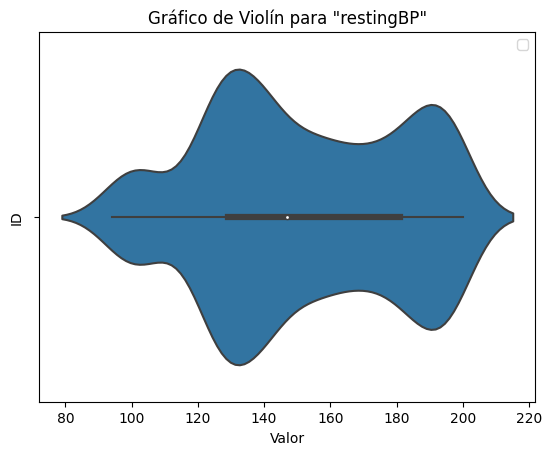

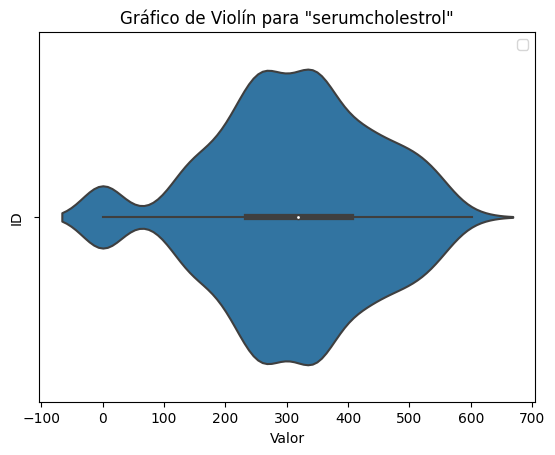

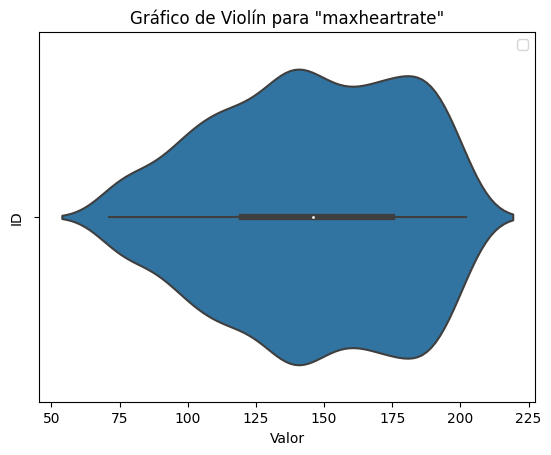

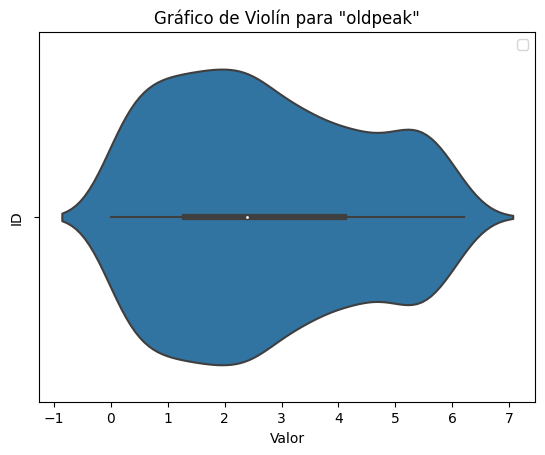

In [108]:
# Iterar sobre las columnas y crear gráficos de violín
for columna in df.columns:
    if columna in cols_num:  # Evitar graficar la columna 'ID'
        sns.violinplot(x=df[columna], orient='h', label=columna)
        # Añadir etiquetas y leyenda
        plt.xlabel('Valor')
        plt.ylabel('ID')
        plt.title('Gráfico de Violín para "'+columna+'"')
        plt.legend()

        # Mostrar el gráfico
        plt.show()

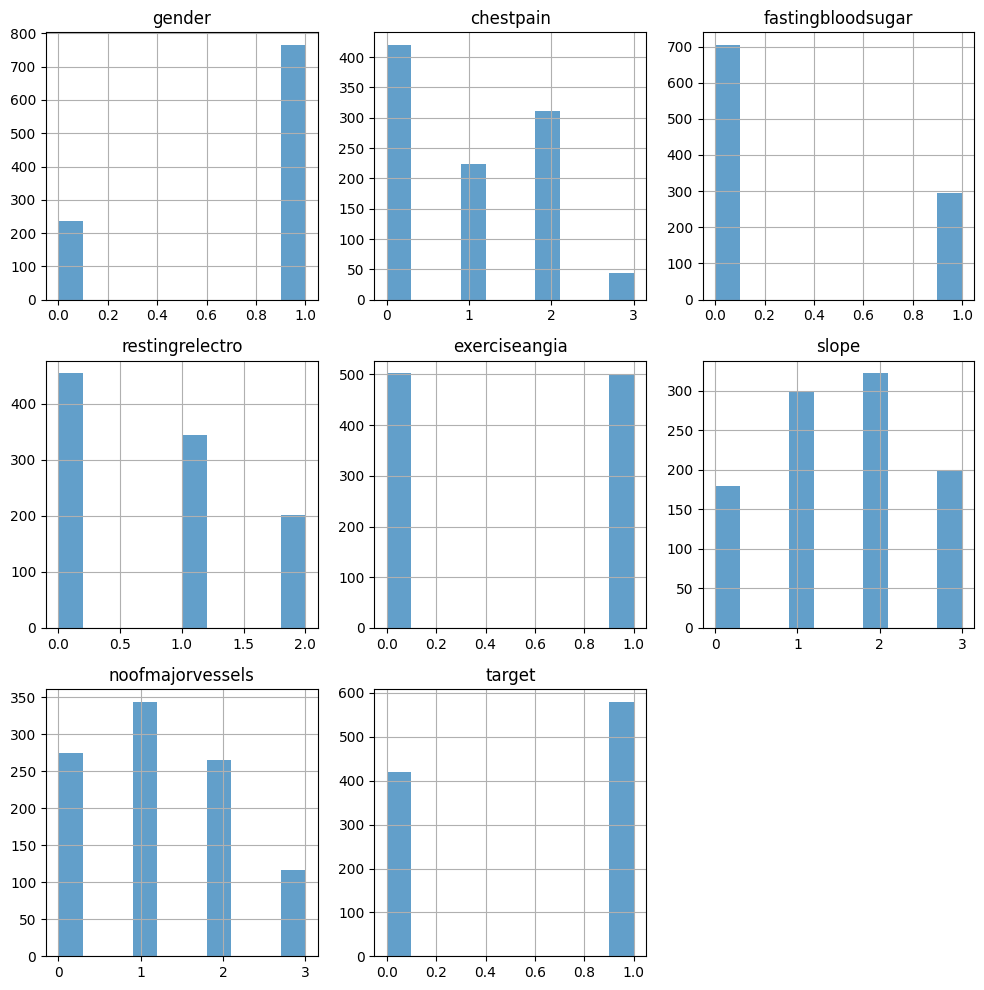

In [109]:
df.hist(column = cols_cat, alpha=0.7, figsize=(10, 10))
plt.tight_layout()

# Escalar los datos numericos

In [110]:
scaler = MinMaxScaler()
# Aplicar el escalado a las columnas seleccionadas
df[cols_num] = scaler.fit_transform(df[cols_num])
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,0.487367,0.765000,0.980000,0.544783,0.517354,0.296000,0.748000,0.568527,0.498000,0.436726,1.540000,1.222000,0.580000
std,2.895905e+06,0.297746,0.424211,0.953157,0.282691,0.220006,0.456719,0.770123,0.260994,0.500246,0.277541,1.003697,0.977585,0.493805
min,1.033680e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,0.233333,1.000000,0.000000,0.330189,0.391611,0.000000,0.000000,0.372137,0.000000,0.209677,1.000000,0.000000,0.000000
50%,4.952508e+06,0.483333,1.000000,1.000000,0.500000,0.528239,0.000000,1.000000,0.572519,0.000000,0.387097,2.000000,1.000000,1.000000
75%,7.681877e+06,0.737500,1.000000,2.000000,0.820755,0.671512,1.000000,1.000000,0.793893,1.000000,0.661290,2.000000,2.000000,1.000000
max,9.990855e+06,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000


# Regresion logistica

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [112]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop(['patientid', 'target'], axis=1)
y = df['target']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=42)

# Entrenar el modelo
modelo_logistico.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_logistico.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)
conf_matrix = confusion_matrix(y_test, predicciones)
report = classification_report(y_test, predicciones)

# Imprimir métricas de rendimiento
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        83
           1       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



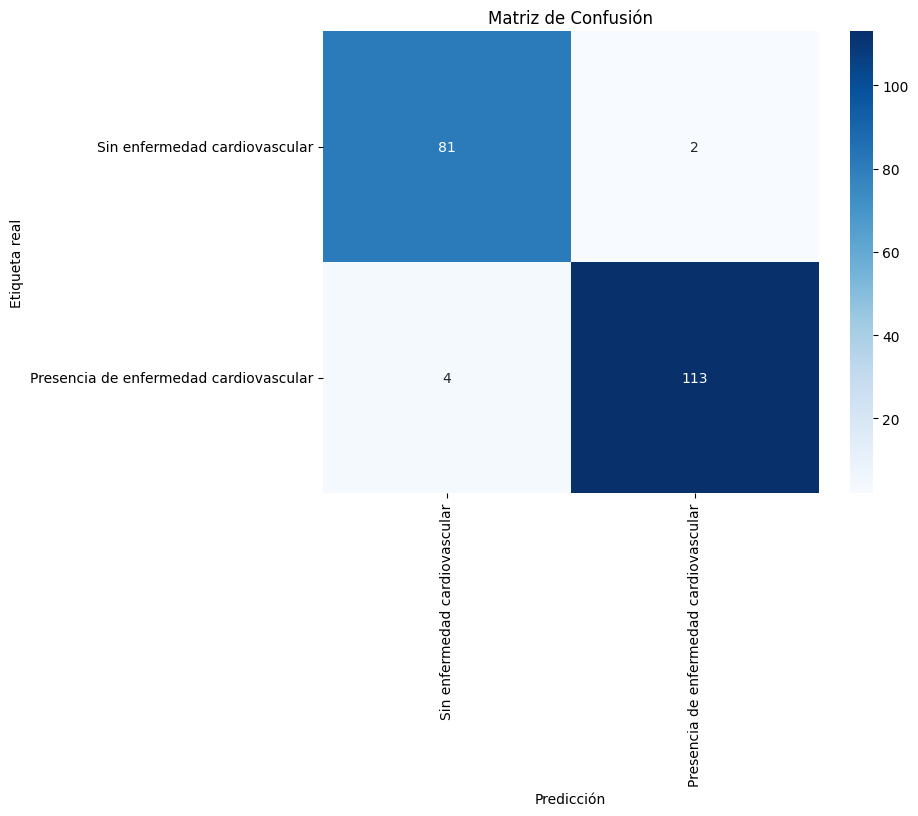

In [113]:
# Graficar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin enfermedad cardiovascular', 'Presencia de enfermedad cardiovascular'],
            yticklabels=['Sin enfermedad cardiovascular', 'Presencia de enfermedad cardiovascular'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión')
plt.show()

# Arbol de decision

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
# Crear el modelo de árbol de decisiones
modelo_arbol_decision = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
modelo_arbol_decision.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo_arbol_decision.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predicciones)
conf_matrix = confusion_matrix(y_test, predicciones)
report = classification_report(y_test, predicciones)

# Imprimir métricas de rendimiento
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        83
           1       0.95      0.99      0.97       117

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



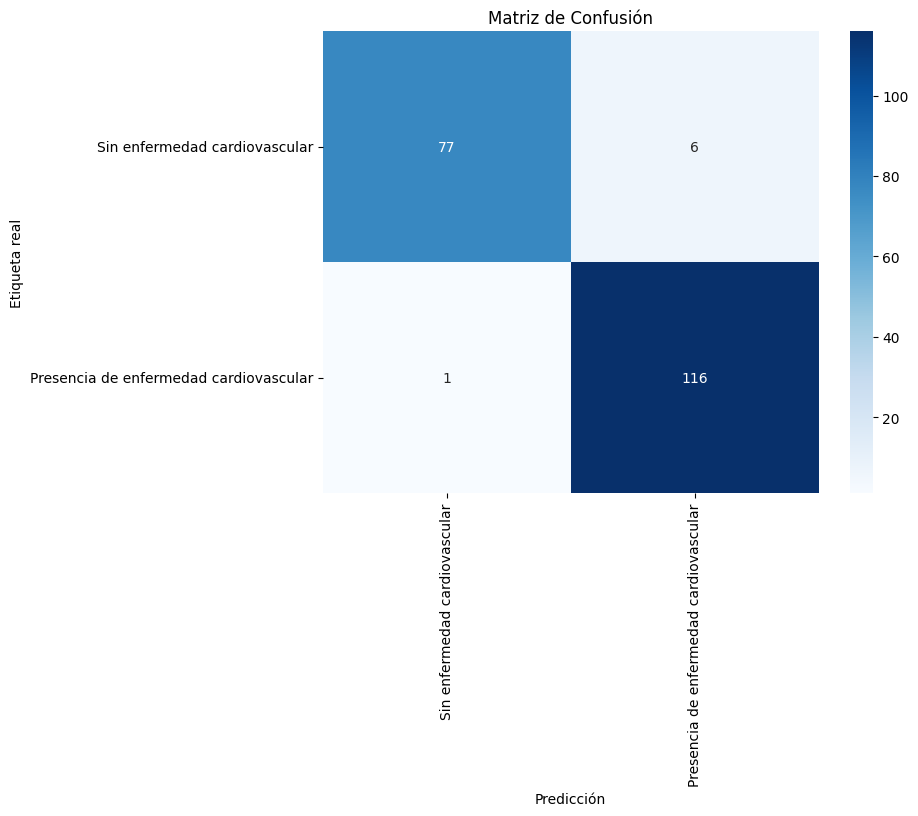

In [116]:
# Graficar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sin enfermedad cardiovascular', 'Presencia de enfermedad cardiovascular'],
            yticklabels=['Sin enfermedad cardiovascular', 'Presencia de enfermedad cardiovascular'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión')
plt.show()

Lo importante para este modelo es detectar las personas que si tienen una enfermedad cardiovascular, ya que estan en riesgo, por esa razon la metrica mas importante para el modelo seria Recall, ya que se sentra en los datos positivos, es decir que tengan 1 (presencia de enfermedad). por esta razon, elijo el arbol de decision que tiene un resultado de 0.99, con solo 1 dato erroneo, donde etiqueto a una persona que si tiene una enfermedad cardiovascular, como si no tuviera.

[Text(0.4879032258064516, 0.9545454545454546, 'slope <= 1.5\ngini = 0.488\nsamples = 800\nvalue = [337, 463]\nclass = Presencia de enfermedad cardiovascular'),
 Text(0.25806451612903225, 0.8636363636363636, 'restingBP <= 0.613\ngini = 0.256\nsamples = 385\nvalue = [327, 58]\nclass = Sin enfermedad cardiovascular'),
 Text(0.12903225806451613, 0.7727272727272727, 'serumcholestrol <= 0.776\ngini = 0.097\nsamples = 295\nvalue = [280, 15]\nclass = Sin enfermedad cardiovascular'),
 Text(0.0967741935483871, 0.6818181818181818, 'serumcholestrol <= 0.11\ngini = 0.06\nsamples = 289\nvalue = [280, 9]\nclass = Sin enfermedad cardiovascular'),
 Text(0.06451612903225806, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Presencia de enfermedad cardiovascular'),
 Text(0.12903225806451613, 0.5909090909090909, 'chestpain <= 1.5\ngini = 0.048\nsamples = 287\nvalue = [280, 7]\nclass = Sin enfermedad cardiovascular'),
 Text(0.06451612903225806, 0.5, 'restingrelectro <= 1.5\ngini = 0.00

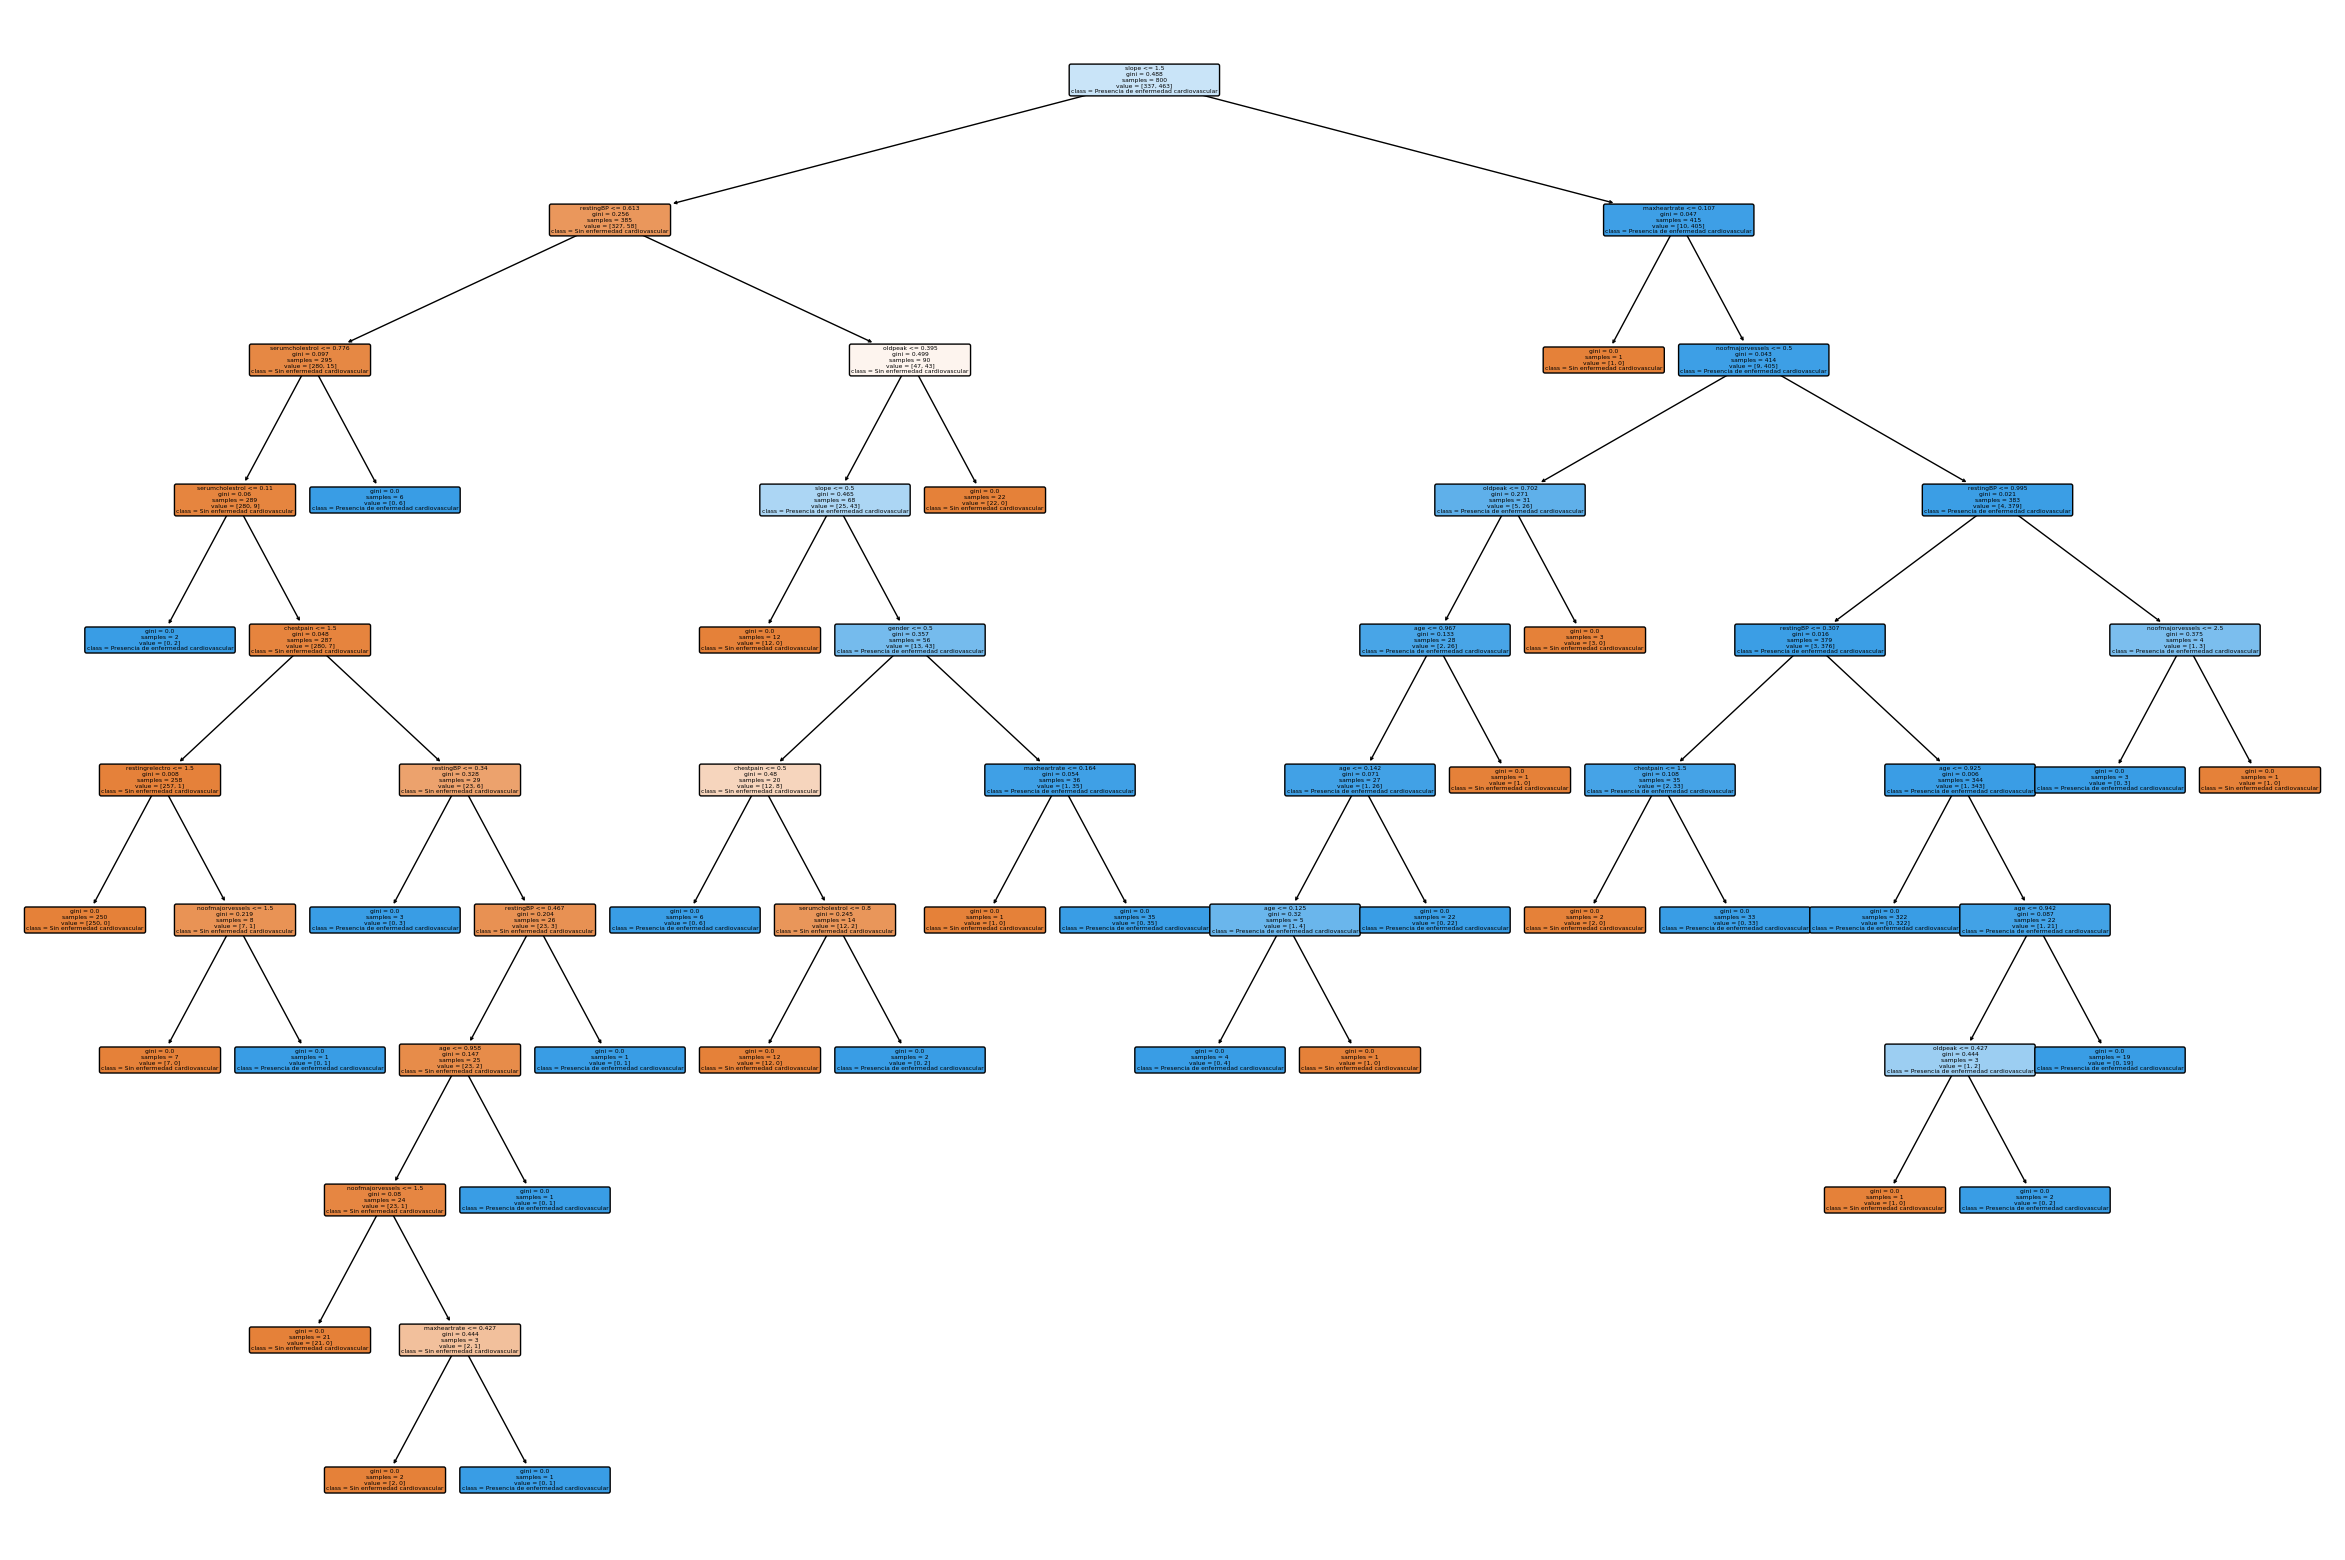

In [117]:
plt.figure(figsize=(30, 20))
tree.plot_tree(modelo_arbol_decision,
               feature_names=X_train.columns,
               class_names=["Sin enfermedad cardiovascular","Presencia de enfermedad cardiovascular"],
               filled=True,
               rounded=True)

In [118]:
import random

X_test_ejemplo = X_test.reset_index(drop=True)
columnas = X_test_ejemplo.columns

datos_aleatorios = np.array([random.choice(X_test_ejemplo[columna]) for columna in columnas])

# Imprimir el array con los datos aleatorios
print("Para el paciente con estas caracteristicas : ")
print(datos_aleatorios)

# Hacer predicciones en el conjunto de prueba
datos_aleatorios_2D = datos_aleatorios.reshape(1, -1)
prediccion = modelo_arbol_decision.predict(datos_aleatorios_2D)

if prediccion == 0:
    print(f'El modelo predice que el paciente NO tiene enfermedades cardiovasculares')
else:
    print(f'El modelo predice que el paciente SI tiene enfermedades cardiovasculares')


Para el paciente con estas caracteristicas : 
[0.73333333 1.         0.         0.89622642 0.37043189 1.
 1.         0.44274809 0.         0.06451613 1.         2.        ]
El modelo predice que el paciente SI tiene enfermedades cardiovasculares


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


* # Caso 2: Nivel de estrés

In [169]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


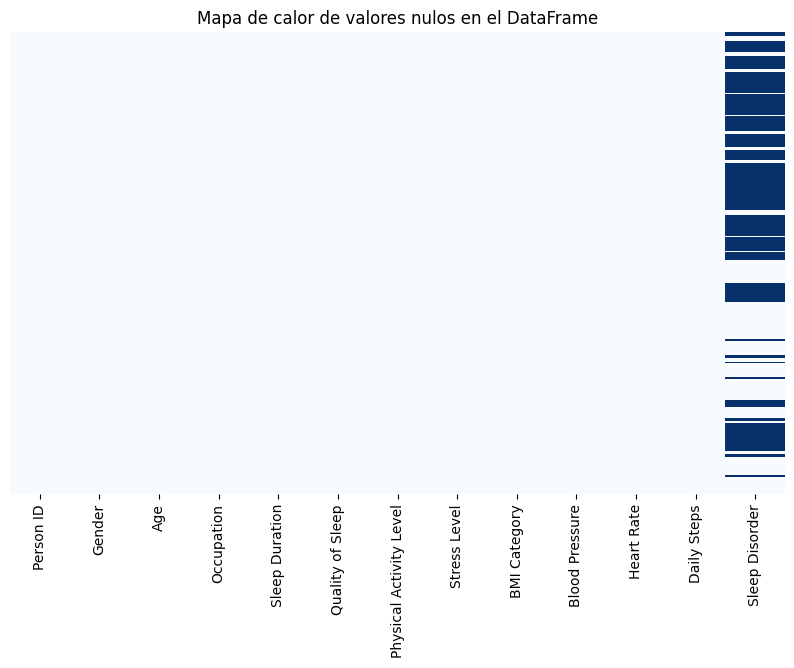

In [170]:
nulos = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(nulos, cmap='Blues', cbar=False, yticklabels=False)
plt.title('Mapa de calor de valores nulos en el DataFrame')
plt.show()

In [171]:
# Porcentaje de valores nulos para cada columna
(df.isna().sum())/len(df) * 100

Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64

In [172]:
df["Sleep Disorder"].value_counts(dropna = False)

Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [173]:
#De acuerdo a la documentacion, se identifica que valores que salen como Nan en la columna "Sleep Disorder" 
#significa que no tiene ningun desorden de sueño, por lo tanto se realizara la imputacion
df.loc[df["Sleep Disorder"].isna(),"Sleep Disorder"] = "No Disorder"

In [174]:
# Porcentaje de valores nulos para cada columna
(df.isna().sum())/len(df) * 100

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [175]:
#Elimianar el ID que no es importante para entrenar el modelo
df = df.drop("Person ID", axis = 1)

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Blood Pressure'] = le.fit_transform(df['Blood Pressure'])
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

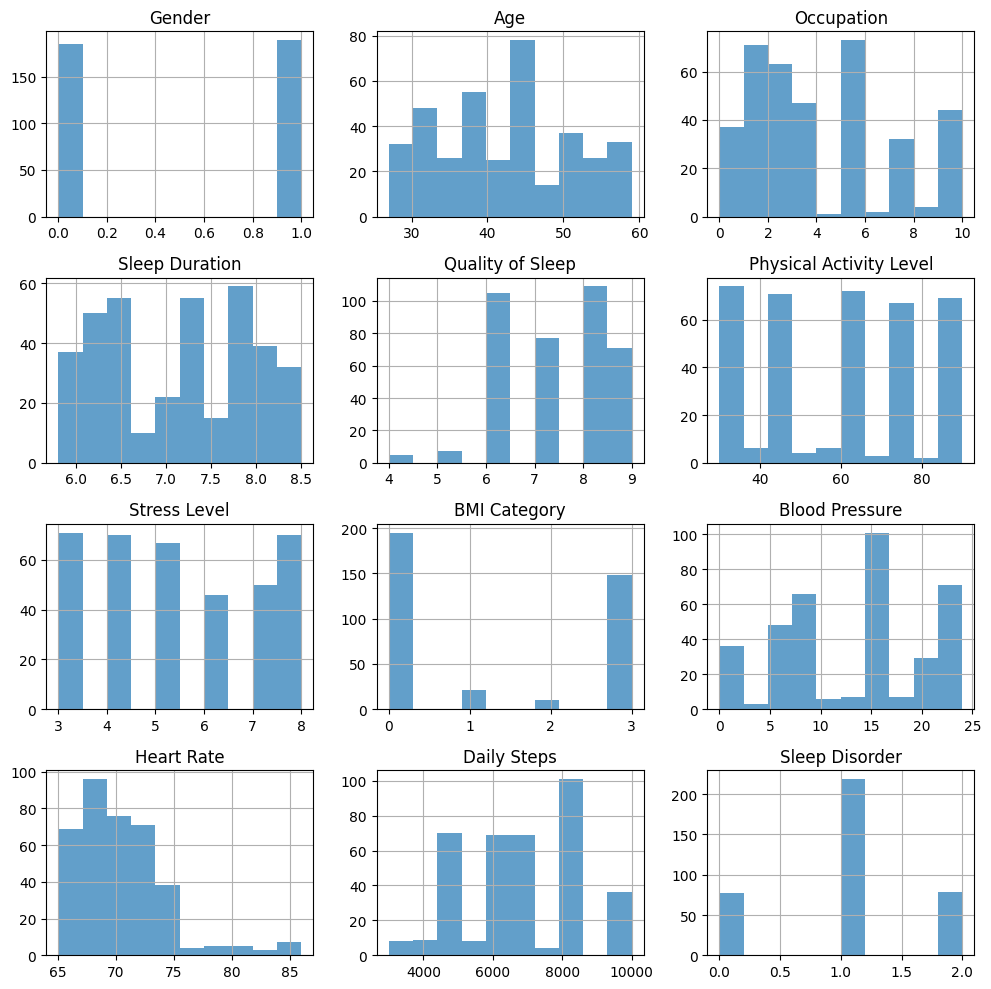

In [177]:
df.hist(column = df.columns, alpha=0.7, figsize=(10, 10))
plt.tight_layout()

In [178]:
cols_escalar = ["Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Heart Rate","Daily Steps"]
scaler = MinMaxScaler()
# Aplicar el escalado a las columnas seleccionadas
df[cols_escalar] = scaler.fit_transform(df[cols_escalar])
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,0.474515,3.772727,0.493365,0.662567,0.486185,5.385027,1.296791,13.114973,0.245989,0.545264,1.002674
std,0.500641,0.271035,3.056081,0.294688,0.239391,0.347180,1.774526,1.431226,7.100590,0.196937,0.231131,0.644626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.257812,1.000000,0.222222,0.400000,0.250000,4.000000,0.000000,9.000000,0.142857,0.371429,1.000000
50%,1.000000,0.500000,3.000000,0.518519,0.600000,0.500000,5.000000,0.000000,15.000000,0.238095,0.571429,1.000000
75%,1.000000,0.718750,5.000000,0.740741,0.800000,0.750000,7.000000,3.000000,20.000000,0.333333,0.714286,1.000000
max,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,8.000000,3.000000,24.000000,1.000000,1.000000,2.000000


In [179]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [182]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(['Stress Level'], axis=1)
y = df['Stress Level']
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = linear_model.LinearRegression()
regressor = regressor.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)
# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.13182547739944114
Root Mean Squared Error (RMSE): 0.36307778422734865
R-squared (R²): 0.9578059456941017


In [184]:
# Obtener los pesos
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': regressor.coef_})

print('Intercepto:', regressor.intercept_)
print('Coeficientes:')
print(coeficientes)


Intercepto: 8.015943202373421
Coeficientes:
                   Variable  Coeficiente
0                    Gender     0.797285
1                       Age     1.959702
2                Occupation    -0.086144
3            Sleep Duration    -1.190082
4          Quality of Sleep    -5.855757
5   Physical Activity Level    -0.532098
6              BMI Category    -0.157582
7            Blood Pressure    -0.010535
8                Heart Rate     1.278230
9               Daily Steps     1.730776
10           Sleep Disorder     0.167932


In [200]:
for predicted, actual in zip(y_predicted[:20], y_train[:20]):
    print(f'prediccion: {predicted:.2f}, actual: {actual:.2f}, diferencia: {abs(predicted - actual):.2f}')

prediccion: 6.94, actual: 7.00, diferencia: 0.06
prediccion: 7.66, actual: 8.00, diferencia: 0.34
prediccion: 4.32, actual: 5.00, diferencia: 0.68
prediccion: 3.02, actual: 3.00, diferencia: 0.02
prediccion: 7.29, actual: 7.00, diferencia: 0.29
prediccion: 4.78, actual: 6.00, diferencia: 1.22
prediccion: 7.99, actual: 8.00, diferencia: 0.01
prediccion: 5.70, actual: 6.00, diferencia: 0.30
prediccion: 4.94, actual: 5.00, diferencia: 0.06
prediccion: 4.40, actual: 4.00, diferencia: 0.40
prediccion: 3.02, actual: 3.00, diferencia: 0.02
prediccion: 3.05, actual: 3.00, diferencia: 0.05
prediccion: 7.84, actual: 8.00, diferencia: 0.16
prediccion: 4.64, actual: 5.00, diferencia: 0.36
prediccion: 4.40, actual: 4.00, diferencia: 0.40
prediccion: 2.95, actual: 3.00, diferencia: 0.05
prediccion: 7.60, actual: 8.00, diferencia: 0.40
prediccion: 5.15, actual: 5.00, diferencia: 0.15
prediccion: 3.00, actual: 3.00, diferencia: 0.00
prediccion: 7.09, actual: 7.00, diferencia: 0.09


In [195]:
y_predicted = regressor.predict(X_train)

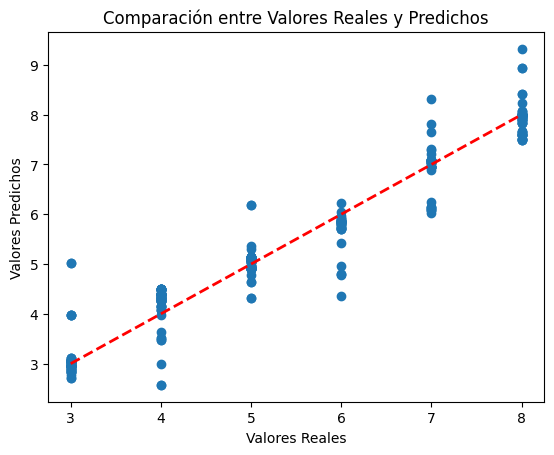

In [197]:
plt.scatter(y_train, y_predicted)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos en train')
plt.show()

In [199]:
# Calcular el máximo y mínimo
maximo = np.max(y_predicted)
minimo = np.min(y_predicted)

print(f'Máximo: {maximo}')
print(f'Mínimo: {minimo}')

Máximo: 9.319828138807914
Mínimo: 2.5727632552546327


El modelo tiene metricas de evaluacion muy buenas, como un R2 de 0.95 y un MSE de 0.13, sin mebargo hay que tener cuidado, porque algunas prediciones dan mas de 8, y otras menores que 3, lo cual no es adecuado, porque el modelo se entreno con valores de 3 a 8 en niveles de estres, 

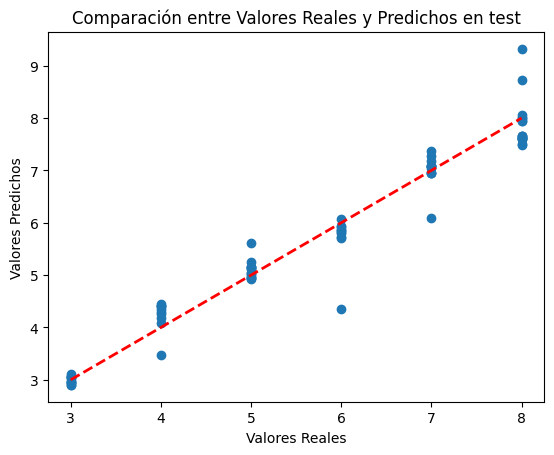

In [202]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos en test')
plt.show()

# Ejemplo de prediccion de nivel de estres con el modelo y los datos de entrada 

In [207]:
import random

X_test_ejemplo = X_test.reset_index(drop=True)
columnas = X_test_ejemplo.columns

datos_aleatorios = np.array([random.choice(X_test_ejemplo[columna]) for columna in columnas])

# Imprimir el array con los datos aleatorios
print("Para el personas con estas caracteristicas : ")
print(datos_aleatorios)

# Hacer predicciones en el conjunto de prueba
datos_aleatorios_2D = datos_aleatorios.reshape(1, -1)
prediccion = regressor.predict(datos_aleatorios_2D)
# Evaluar la variable y asignar la etiqueta correspondiente
if 0 <= prediccion <= 3:
    nivel_estres = "Nivel de estrés: no estresado"
elif 4 <= prediccion <= 7:
    nivel_estres = "Nivel de estrés: estresado"
else:
    nivel_estres = "Nivel de estrés: extremadamente estresado"

print(nivel_estres)

Para el personas con estas caracteristicas : 
[ 0.          0.25        3.          0.11111111  0.6         0.75
  2.         23.          0.33333333  0.04285714  1.        ]
Nivel de estrés: estresado


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
